# Kmer matrix Analysis

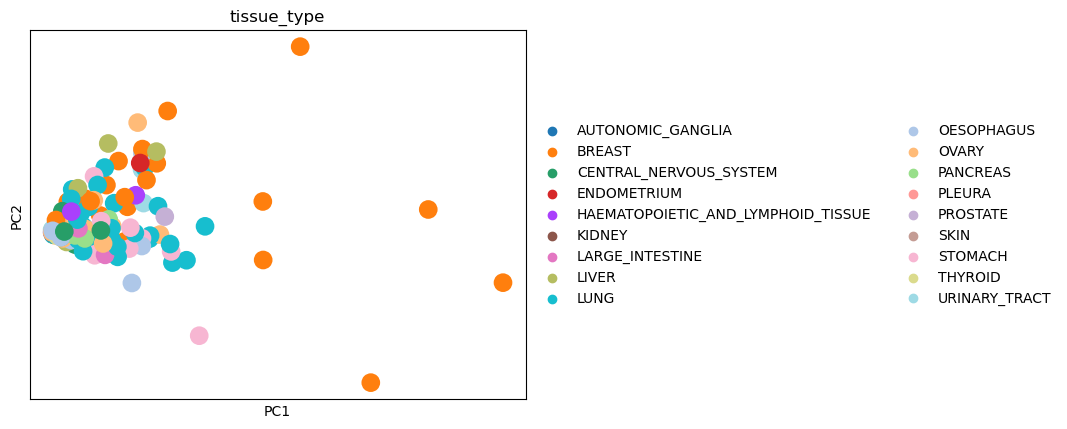

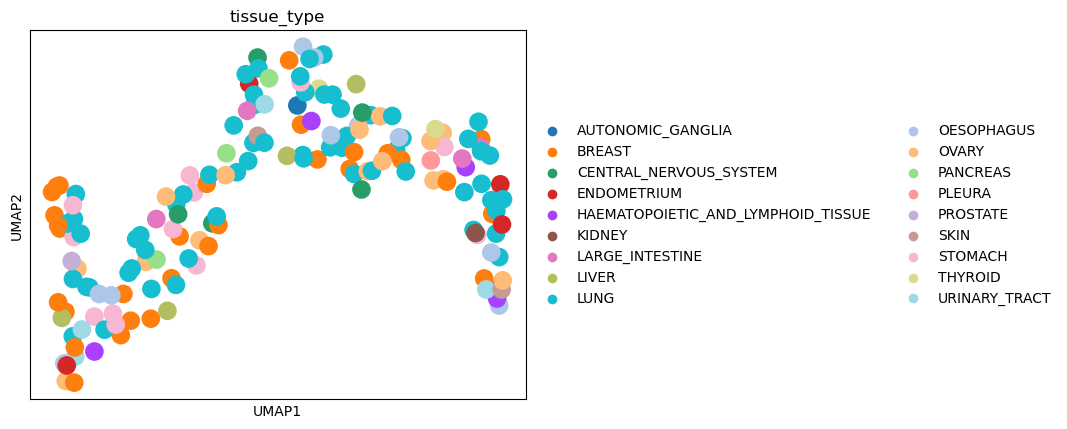

In [32]:
import anndata as ad
import scanpy as sc

adata_file = "aggreaged_sample_by_6-mer.h5ad"
pca_plot = "aggreaged_sample_by_6-mer.pca.pdf"
umap_plot = "aggreaged_sample_by_6-mer.umap.pdf"

adata = ad.read_h5ad(adata_file)

# Add Tissue Types
tissue_types = []
for string in adata.obs.index:
    tissue_types.append(string.split("_",1)[1])
adata.obs["tissue_type"] = tissue_types

# PCA
sc.tl.pca(adata)
sc.pl.pca(
    adata,
    color=["tissue_type"],
    save = pca_plot
)

# UMAP
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(
    adata,
    color="tissue_type",
    save = umap_plot
)

In [2]:
import pandas as pd

In [24]:
counts_file = "counts_7-mer/aggregated_ec_7-mer.counts/count.txt"
df = pd.read_csv(counts_file, 
        header=None, 
        sep = "\t",
        engine="python"
        )

In [ ]:
# Put into kmer x region counts matrix
kmer_columns = {}
# Loop through each row and column to extract k-mer counts
for idx, row in df.iterrows():
    for col in row.index[1:]:  # Skip the first column (region info)
        try:
            kmer, count = row[col].split(':')
            count = int(count)
            if kmer not in kmer_columns:
                kmer_columns[kmer] = [0] * len(df)
            kmer_columns[kmer][idx] = count
        except:
            pass

kmer_df = pd.DataFrame(kmer_columns)

# Add counts labels
kmer_df.insert(0, 'Region', df.iloc[:, 0])
kmer_df["Region"] = kmer_df["Region"].str.replace('>', '')
kmer_df = kmer_df.set_index("Region")

# Combine regions into samplestring_rangess:
bed_df = pd.read_csv(bed_file, 
    sep="\t",
    header = None,
    names = ["chr","start","end","sample_name"],
    dtype = {"start":"str", "end":"str"}
    )

bed_df["region"] = bed_df["chr"] + ":" +  bed_df["start"] + "-" + bed_df["end"]

region_sample_map = bed_df.set_index('region')['sample_name'].to_dict()

kmer_df['sample_name'] = kmer_df.index.map(region_sample_map)
sample_by_kmer = kmer_df.groupby('sample_name').sum()

In [25]:
df

,0,1
0,>chr6:20350615-22839372,CATTTTC:1016 CCCAATA:228 AAGGGCG:35 ATTTGGA:63...
1,>chr3:9099507-9519221,CATTTTC:131 CCCAATA:33 AAGGGCG:12 ATTTGGA:95 A...
2,>chr3:9521655-10184493,CATTTTC:154 CCCAATA:45 AAGGGCG:23 ATTTGGA:111 ...
3,>chr3:10187258-14005720,CATTTTC:1137 CCCAATA:262 AAGGGCG:114 ATTTGGA:6...
4,>chr8:124484622-125582885,CATTTTC:386 CCCAATA:98 AAGGGCG:26 ATTTGGA:248 ...
...,...,...
1133,>chr8:40451995-40612216,CATTTTC:67 CCCAATA:14 AAGGGCG:3 ATTTGGA:38 AGC...
1134,>chr8:40612915-40917114,CATTTTC:123 CCCAATA:26 AAGGGCG:3 ATTTGGA:80 AG...
1135,>chr8:40922253-42332922,CATTTTC:427 CCCAATA:110 AAGGGCG:39 ATTTGGA:256...
1136,>chr8:42336862-42520419,CATTTTC:54 CCCAATA:10 AAGGGCG:5 ATTTGGA:39 AGC...


In [62]:
def kmerCountsDataFrame(counts_file, bed_file):
    # Read the input file with tab as the only separator
    df = pd.read_csv(counts_file, 
        header=None, 
        sep="\t"
        )

    # Create a dictionary to store k-mer counts
    kmer_columns = {}

    # Loop through each row to process the k-mer counts
    for idx, row in df.iterrows():
        try:
            kmer_counts = row[1].split(" ")
        except:
            pass
            # Some columns are shorter than the min kmer count. We skip those.
        for kmer_count in kmer_counts:
            try:
                kmer, count = kmer_count.split(':')
                count = int(count)
                if kmer not in kmer_columns:
                    kmer_columns[kmer] = [0] * len(df)
                kmer_columns[kmer][idx] = count
            except:
                pass

    # Convert the kmer_columns dictionary to a DataFrame
    kmer_df = pd.DataFrame(kmer_columns)

    # Add region information to the DataFrame
    kmer_df.insert(0, 'Region', df[0])
    kmer_df["Region"] = kmer_df["Region"].str.replace('>', '')
    kmer_df = kmer_df.set_index("Region")

    # Read the BED file to map regions to sample names
    bed_df = pd.read_csv(bed_file, 
        sep="\t",
        header=None,
        names=["chr", "start", "end", "sample_name"],
        dtype={"start": "str", "end": "str"}
        )

    bed_df["region"] = bed_df["chr"] + ":" +  bed_df["start"] + "-" + bed_df["end"]
    region_sample_map = bed_df.set_index('region')['sample_name'].to_dict()

    # Map regions to sample names and sum k-mer counts by sample
    kmer_df['sample_name'] = kmer_df.index.map(region_sample_map)
    sample_by_kmer = kmer_df.groupby('sample_name').sum()

    return sample_by_kmer


In [21]:
len(df.iloc[1][1].split(" "))

8122

In [28]:
counts_file = "counts_6-mer/aggregated_ec_6-mer.counts/count.txt"
bed_file = "AA_CCLE_hg38_aggregated_050323.bed"

In [56]:
import numpy as np

In [60]:
df = pd.read_csv(counts_file, 
        header=None, 
        sep="\t"
        )
# Create a dictionary to store k-mer counts
kmer_columns = {}

# Loop through each row to process the k-mer counts
for idx, row in df.iterrows():
    if row[1] == np.NaN:
        continue
    kmer_counts = row[1].split(" ")
    for kmer_count in kmer_counts:
        try:
            kmer, count = kmer_count.split(':')
            count = int(count)
            if kmer not in kmer_columns:
                kmer_columns[kmer] = [0] * len(df)
            kmer_columns[kmer][idx] = count
        except:
            pass


AttributeError: 'float' object has no attribute 'split'

In [48]:

# Convert the kmer_columns dictionary to a DataFrame
kmer_df = pd.DataFrame(kmer_columns)

# Add region information to the DataFrame
kmer_df.insert(0, 'Region', df[0])
kmer_df["Region"] = kmer_df["Region"].str.replace('>', '')
kmer_df = kmer_df.set_index("Region")

# Read the BED file to map regions to sample names
bed_df = pd.read_csv(bed_file, 
    sep="\t",
    header=None,
    names=["chr", "start", "end", "sample_name"],
    dtype={"start": "str", "end": "str"}
    )

bed_df["region"] = bed_df["chr"] + ":" +  bed_df["start"] + "-" + bed_df["end"]
region_sample_map = bed_df.set_index('region')['sample_name'].to_dict()

# Map regions to sample names and sum k-mer counts by sample
kmer_df['sample_name'] = kmer_df.index.map(region_sample_map)
sample_by_kmer = kmer_df.groupby('sample_name').sum()


In [49]:
sample_by_kmer

,GCCTCA,CTTCGA,AAGTCC,AACGGA,TAACGA,CCGTTA,ACCGCT,TTAGAA,CCGCGC,ACATAA,...,GGTCGA,AAATAA,CATCGG,GGAGTA,ACGCTA,AGCGAC,GTGATA,GTGCAC,CCCTCC,CCACGC
sample_name,,,,,,,,,,,,,,,,,,,,,
5637_URINARY_TRACT,8033,532,3326,614,439,343,494,5444,682,4583,...,359,14718,493,2303,388,464,2692,1469,6987,1940
59M_OVARY,4182,303,2134,364,315,215,261,4409,285,3719,...,197,11768,232,1489,230,244,1985,869,3180,843
8305C_THYROID,1502,75,590,89,62,60,72,1152,108,1078,...,66,3333,49,456,72,69,581,241,906,319
A3KAW_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,231,12,103,13,17,9,22,166,11,150,...,7,424,13,55,13,18,73,38,247,53
ABC1_LUNG,1770,103,924,155,113,88,116,1778,149,1678,...,75,5105,115,643,81,95,874,366,1727,341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
THP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,2112,114,672,120,81,67,122,1019,269,850,...,86,3054,82,509,65,110,522,308,1555,540
U251MG_CENTRAL_NERVOUS_SYSTEM,885,65,472,60,67,41,57,890,57,811,...,33,2421,38,304,47,45,431,174,745,157
UACC812_BREAST,13241,1007,6720,1184,979,656,837,16247,1212,14277,...,609,45017,763,5334,752,746,7239,2483,10797,2810


In [72]:
adata

AnnData object with n_obs × n_vars = 166 × 131072
    obs: 'tissue_type'
    uns: 'neighbors', 'umap', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [2]:
import anndata as ad
import scanpy as sc
import numpy as np

In [3]:
adata_file = "aggregated_ec_6-mer.counts/counts_10-mer/aggreaged_sample_by_10-mer.h5ad"

adata = ad.read_h5ad(adata_file)

In [11]:
#adata.var.loc["ACACAAGC"]
#adata.var.loc["GCTTGTGT"]

In [6]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.pca(adata)

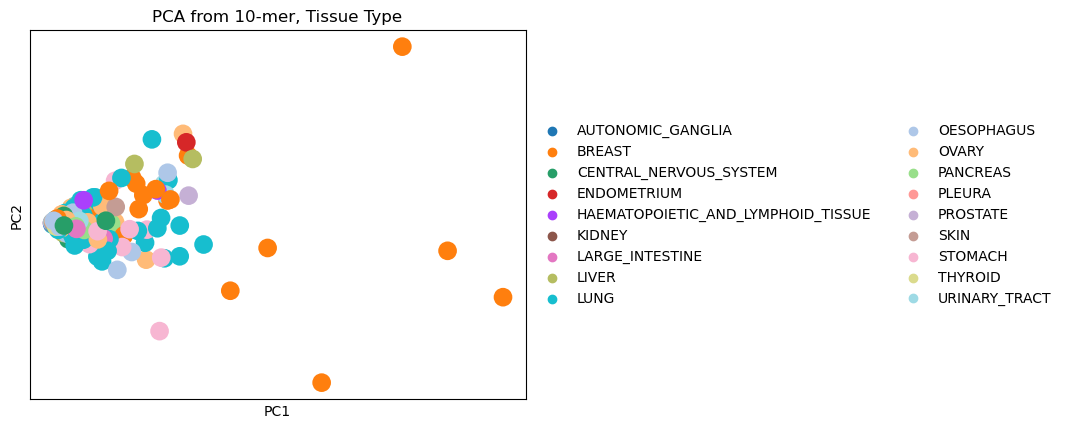

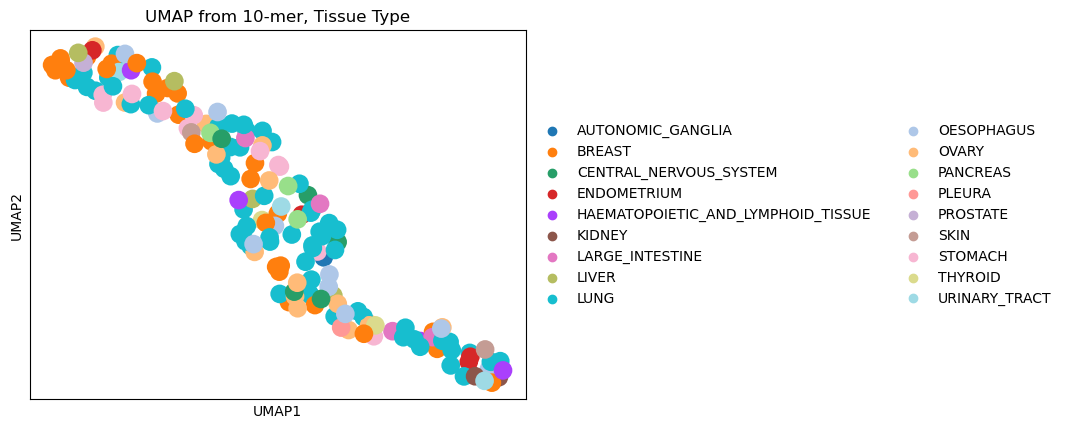

In [10]:
sc.pl.pca(
    adata,
    color=["tissue_type"],
    save = "10mer.pca.jpg",
    title = f"PCA from {10}-mer, Tissue Type",
    show = True
)

    # UMAP
sc.pl.umap(
    adata,
    color="tissue_type",
    save = "10mer.umap.jpg",
    title = f"UMAP from {10}-mer, Tissue Type",
    show = True
)

In [ ]:
import numpy as np

# Store original PCs to restore later
original_pcs = adata.obsm['X_pca'].copy()

# Replace the first and second PCs with the 3rd and 4th PCs
adata.obsm['X_pca'][:, 0] = original_pcs[:, 0]
adata.obsm['X_pca'][:, 1] = original_pcs[:, 1]

# Plot the "first" two PCs, which are now the 3rd and 4th PCs
sc.pl.pca(adata, color='tissue_type')  # Example color coding by Louvain clusters

# Restore the original PCs
adata.obsm['X_pca'] = original_pcs

KeyError: 'X_pca'